C:\Users\vatch\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


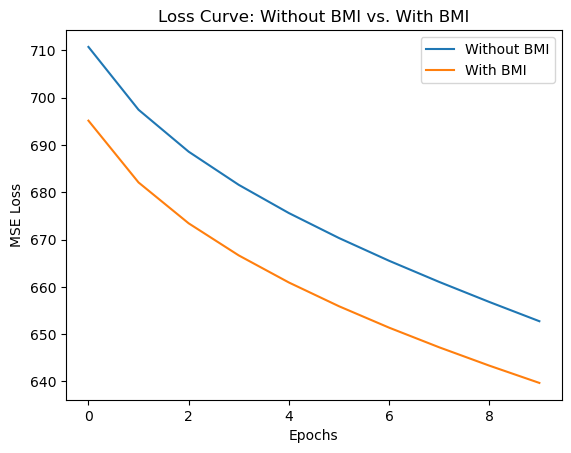

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

# Generate sample dataset (height, weight, age, smoking, premium)
X = np.array([
    [5, 10, 30, 1],
    [6, 15, 25, 0],
    [5.5, 12, 28, 1],
    [5.8, 14, 35, 0],
    [5.2, 11, 40, 1]
], dtype=np.float32)
y = np.array([20, 25, 22, 30, 28], dtype=np.float32)  # Target (insurance premium)

# Normalize input data
X[:, 0] /= 10  # Normalize height
X[:, 1] /= 20  # Normalize weight
X[:, 2] /= 50  # Normalize age

# Define feedforward network (Without BMI)
model1 = Sequential([
    Dense(2, input_dim=4, activation=None),
    Dense(1, activation=None)
])

model1.compile(optimizer=RMSprop(learning_rate=0.01), loss='mse')

# Train model1 (Without BMI)
history1 = model1.fit(X, y, epochs=10, verbose=0)

# Compute BMI and add as new feature
BMI = (X[:, 1] * 20) / (X[:, 0] * 10) ** 2  # BMI = weight / height^2
X_with_BMI = np.column_stack((X, BMI))  # Add BMI as a new column

# Define feedforward network (With BMI)
model2 = Sequential([
    Dense(2, input_dim=5, activation=None),
    Dense(1, activation=None)
])

model2.compile(optimizer=RMSprop(learning_rate=0.01), loss='mse')

# Train model2 (With BMI)
history2 = model2.fit(X_with_BMI, y, epochs=10, verbose=0)

# Plot loss curves
plt.plot(history1.history['loss'], label='Without BMI')
plt.plot(history2.history['loss'], label='With BMI')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss Curve: Without BMI vs. With BMI')
plt.legend()
plt.show()
